<br />
<div style="text-align: center;">
    <span style="font-weight: bold; color:#6dc; font-family: 'Arial'; font-size: 2.5em;">CMAP: Climate Prediction Center Merged Analysis of<br /><br /> Precipitation (NOAA, OAR, ESRL PSD)</span>
</div>

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import urllib2
from contextlib import closing
from matplotlib.pyplot import cm
import matplotlib.image as mpimg
import rasterio
import os
import shutil
import matplotlib.pyplot as plt
import netCDF4
%matplotlib inline

/Users/vizzuality/anaconda/lib/python2.7/site-packages/xarray/core/formatting.py:16: FutureWarning: The pandas.tslib module is deprecated and will be removed in a future version.
  from pandas.tslib import OutOfBoundsDatetime


<span style="color:#6dc; font-family: 'Arial'; font-size: 2em;">
**Precipitation**</span>

<span style="color:grey; font-family: 'Arial'; font-size: 1.5;">
We'll open the file to see general info and variables.</span>

In [2]:
remote_path = 'ftp://ftp.cdc.noaa.gov/Datasets/cmap/enh/'
last_file = 'precip.mon.ltm.nc'

local_path = os.getcwd()

print (remote_path)
print (last_file)
print (local_path)

ftp://ftp.cdc.noaa.gov/Datasets/cmap/enh/
precip.mon.ltm.nc
/Users/vizzuality/Documents/Vizzuality/RW/planet_pulse/Notebooks


In [3]:
with closing(urllib2.urlopen(remote_path+last_file)) as r:
    with open(last_file, 'wb') as f:
        shutil.copyfileobj(r, f)

In [4]:
ncfile = xr.open_dataset(local_path+'/'+last_file, decode_times=False)

In [5]:
print('* Variables disponibles en el fichero:')
for v in ncfile.variables:
    print(v)

* Variables disponibles en el fichero:
lat
lon
time
climatology_bounds
precip
valid_yr_count


In [6]:
#General Info of .nc file
ncfile.info()

xarray.Dataset {
dimensions:
	lat = 72 ;
	lon = 144 ;
	nbnds = 2 ;
	time = 12 ;

variables:
	float32 lat(lat) ;
		lat:units = degrees_north ;
		lat:actual_range = [ 88.75 -88.75] ;
		lat:long_name = Latitude ;
		lat:standard_name = latitude ;
		lat:axis = Y ;
	float32 lon(lon) ;
		lon:units = degrees_east ;
		lon:long_name = Longitude ;
		lon:actual_range = [   1.25  358.75] ;
		lon:standard_name = longitude ;
		lon:axis = X ;
	float64 time(time) ;
		time:units = hours since 1800-01-01 00:00:0.0 ;
		time:long_name = Time ;
		time:delta_t = 0000-01-00 00:00:00 ;
		time:avg_period = 0030-00-00 00:00:00 ;
		time:prev_avg_period = 0000-01-00 00:00:00 ;
		time:standard_name = time ;
		time:axis = T ;
		time:actual_range = [-15769752. -15761736.] ;
		time:climatology = climatology_bounds ;
		time:climo_period = 1981/01/01 - 2010/12/31 ;
		time:ltm_range = [ 1586616.  1848840.] ;
		time:interpreted_actual_range = 0001/01/01 00:00:00 - 0001/12/01 00:00:00 ;
	float64 climatology_bounds(time, nb

In [7]:
# Variables ifno
ncfile.variables

Frozen(OrderedDict([(u'lat', <xarray.IndexVariable u'lat' (lat: 72)>
array([ 88.75,  86.25,  83.75,  81.25,  78.75,  76.25,  73.75,  71.25,  68.75,
        66.25,  63.75,  61.25,  58.75,  56.25,  53.75,  51.25,  48.75,  46.25,
        43.75,  41.25,  38.75,  36.25,  33.75,  31.25,  28.75,  26.25,  23.75,
        21.25,  18.75,  16.25,  13.75,  11.25,   8.75,   6.25,   3.75,   1.25,
        -1.25,  -3.75,  -6.25,  -8.75, -11.25, -13.75, -16.25, -18.75, -21.25,
       -23.75, -26.25, -28.75, -31.25, -33.75, -36.25, -38.75, -41.25, -43.75,
       -46.25, -48.75, -51.25, -53.75, -56.25, -58.75, -61.25, -63.75, -66.25,
       -68.75, -71.25, -73.75, -76.25, -78.75, -81.25, -83.75, -86.25, -88.75], dtype=float32)
Attributes:
    units:          degrees_north
    actual_range:   [ 88.75 -88.75]
    long_name:      Latitude
    standard_name:  latitude
    axis:           Y), (u'lon', <xarray.IndexVariable u'lon' (lon: 144)>
array([   1.25,    3.75,    6.25,    8.75,   11.25,   13.75,   16.25,

In [8]:
#info de la variable precip
ncfile.variables['precip'][:]

<xarray.Variable (time: 12, lat: 72, lon: 144)>
[124416 values with dtype=float64]
Attributes:
    long_name:     Long Term Mean Average Monthly Rate of Precipitation
    valid_range:   [  0.  70.]
    units:         mm/day
    precision:     2
    var_desc:      Precipitation
    dataset:       CPC Merged Analysis of Precipitation Enhanced
    level_desc:    Surface
    statistic:     Long Term Mean
    parent_stat:   Mean
    actual_range:  [  0.          22.38666916]


<span style="color:#6dc; font-family: 'Arial'; font-size: 2em;">
**Let's see the data with matplotlib:**</span>

[u'lat', u'lon', u'time', u'climatology_bounds', u'precip', u'valid_yr_count']
<type 'netCDF4._netCDF4.Variable'>
float32 precip(time, lat, lon)
    long_name: Long Term Mean Average Monthly Rate of Precipitation
    valid_range: [  0.  70.]
    units: mm/day
    add_offset: 0.0
    scale_factor: 1.0
    missing_value: -9.96921e+36
    precision: 2
    least_significant_digit: 2
    var_desc: Precipitation
    dataset: CPC Merged Analysis of Precipitation Enhanced
    level_desc: Surface
    statistic: Long Term Mean
    parent_stat: Mean
    actual_range: [  0.          22.38666916]
unlimited dimensions: 
current shape = (12, 72, 144)
filling off

[[ 0.28666666  0.31399998  0.30833331 ...,  0.34266666  0.3343333   0.294     ]
 [ 0.36566666  0.44399998  0.46066666 ...,  0.41233331  0.414       0.35433337]
 [ 0.6093334   0.69699997  0.76533335 ...,  0.62800002  0.62499988
   0.58699995]
 ..., 
 [ 0.47366664  0.46433339  0.46999997 ...,  0.49366671  0.48566666
   0.48166665]
 [ 0.4859999

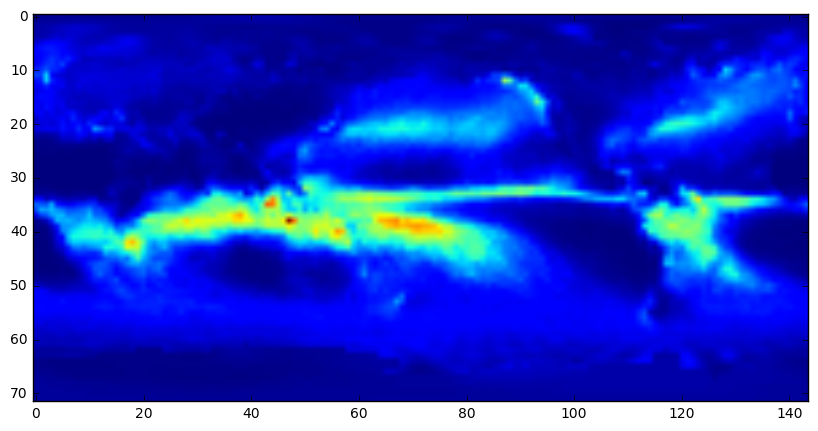

In [9]:
# open a local NetCDF file or remote OPeNDAP URL
url =local_path+'/'+last_file
nc = netCDF4.Dataset(url)

# examine the variables
print nc.variables.keys()
print nc.variables['precip']

# sample every 10th point of the 'z' variable
topo = nc.variables['precip'][0,:,:]
print topo

idxs = np.where([val == -9.96921e+36 for val in topo])[0]
topo[idxs] = -1

# make image
plt.figure(figsize=(10,10))
plt.imshow(topo)

<span style="color:#6dc; font-family: 'Arial'; font-size: 2em;">
**GitHub**</span>

In [1]:
import numpy as np
from contextlib import closing
import urllib2
import shutil
import os
from netCDF4 import Dataset
import rasterio
import tinys3

In [2]:
def dataDownload(): 
    remote_path = 'ftp://ftp.cdc.noaa.gov/Datasets/cmap/enh/'
    last_file = 'precip.mon.ltm.nc'

    local_path = os.getcwd()

    print (remote_path)
    print (last_file)
    print (local_path)

    with closing(urllib2.urlopen(remote_path+last_file)) as r:
        with open(last_file, 'wb') as f:
            shutil.copyfileobj(r, f)

    ncfile = Dataset(local_path+'/'+last_file)
    
    return last_file

In [3]:
def netcdf2tif(dst,outFile):
    nc = Dataset(dst)
    data = nc['precip'][0,:,:]
    
    #data[data == -9.96921e+36] = -1
    idxs = np.where([val == -9.96921e+36 for val in data])[0]
    data[idxs] = -1

    print data
    
    # Return lat info
    south_lat = -88.75
    north_lat = 88.75

    # Return lon info
    west_lon = -178.75
    east_lon = 178.75
    # Transformation function
    transform = rasterio.transform.from_bounds(west_lon, south_lat, east_lon, north_lat, data.shape[1], data.shape[0])
    # Profile
    profile = {
        'driver':'GTiff', 
        'height':data.shape[0], 
        'width':data.shape[1], 
        'count':1, 
        'dtype':np.int16, 
        'crs':'EPSG:4326', 
        'transform':transform, 
        'compress':'lzw', 
        'nodata': -1
    }
    with rasterio.open(outFile, 'w', **profile) as dst:
        dst.write(data.astype(profile['dtype']), 1)

In [4]:
def s3Upload(outFile):
    # Push to Amazon S3 instance
    conn = tinys3.Connection(os.getenv('S3_ACCESS_KEY'),os.getenv('S3_SECRET_KEY'),tls=True)
    f = open(outFile,'rb')
    conn.upload(outFile,f,os.getenv('BUCKET'))

In [5]:
# Execution
outFile ='cmap.tif'
print 'starting'
file = dataDownload()
print 'downloaded'
netcdf2tif(file,outFile)
print 'converted'
#s3Upload(outFile)
print 'finish'

starting
ftp://ftp.cdc.noaa.gov/Datasets/cmap/enh/
precip.mon.ltm.nc
/Users/vizzuality/Documents/Vizzuality/RW/planet_pulse/Notebooks
downloaded
[[ 0.28666666  0.31399998  0.30833331 ...,  0.34266666  0.3343333   0.294     ]
 [ 0.36566666  0.44399998  0.46066666 ...,  0.41233331  0.414       0.35433337]
 [ 0.6093334   0.69699997  0.76533335 ...,  0.62800002  0.62499988
   0.58699995]
 ..., 
 [ 0.47366664  0.46433339  0.46999997 ...,  0.49366671  0.48566666
   0.48166665]
 [ 0.48599997  0.47633329  0.5066666  ...,  0.47333336  0.4666667
   0.46766663]
 [ 0.50600004  0.50200003  0.49966666 ...,  0.49766669  0.50066668
   0.50233334]]
converted
finish
